# Free Energy Learning 

In [1]:
import sumProduct as sp
import numpy as np
import matplotlib.pyplot as plt
import subprocess
import graphviz as gp
import scipy.special
import scipy.stats

In [2]:
vlist=['H'+str(i) for i in range(20)]
hidden=[sp.variableNode(name, vrange=['pain', 'nopain']) for name in vlist]
Slist=['S'+str(i) for i in range(20)]
sensory=[sp.variableNode(name, vrange=['tickle','noci']) for name in Slist]
variables=sensory+hidden
len(variables)

40

In [3]:
prior=sp.freeEnergyFactorNode()
prior.addNeighbour(hidden[0])

def exprior(condrv,conditioners):
    if condrv[0] is None:
        return 89.0
    if condrv[0]=='nopain':
        return 0.8
    if condrv[0]=='pain':
        return 0.2
    
prior.setPrior(exprior)
factors=[]
factors.append(prior)
prior.predictFactor()

In [4]:
def hiddenprior(condrv,conditioners):
    if condrv[0] is None:
        return 10.0
    if conditioners[0]=='pain':
        if condrv[0]=='pain':
            return 0.4
        if condrv[0]=='nopain':
            return 0.6
    else:
        if condrv[0]=='pain':
            return 0.1
        if condrv[0]=='nopain':
            return 0.9

In [5]:
parent=hidden[0]
hiddenfactors=[]
for child in hidden[1:]:
    fe=sp.freeEnergyFactorNode()
    fe.addNeighbour(child,isConditioner=False)
    fe.addNeighbour(parent,isConditioner=True)
    fe.setPrior(hiddenprior)
    factors.append(fe)
    hiddenfactors.append(fe)
    parent=child
    fe.predictFactor()
print(len(factors))
print(len(hiddenfactors))

20
19


In [6]:
def sensprior(condrv,conditioners):
    if condrv[0] is None:
        return 19.0
    if conditioners[0]=='pain':
        if condrv[0]=='noci':
            return 0.9
        if condrv[0]=='tickle':
            return 0.1
    else:
        if condrv[0]=='tickle':
            return 0.9
        if condrv[0]=='noci':
            return 0.1

In [7]:
sensfactors=[]
for h,s in zip(hidden,sensory):
    f=sp.freeEnergyFactorNode()
    f.addNeighbour(s)
    f.addNeighbour(h,isConditioner=True)
    f.setPrior(sensprior)
    factors+=[f]
    sensfactors+=[f]
    f.predictFactor()
    
allNodes=variables+factors

In [8]:
ppain_tickle=[]
ppain_noci=[]
pnopain_tickle=[]
pnopain_noci=[]
PCpain=[]
PCnopain=[]


In [9]:
Ppain_tickle={}
Ppain_noci={}

In [10]:
for trial in range(20):
    sp.startLearning(allNodes)
    for s in sensory: 
        s.observe('tickle')
    sp.runSumProduct(allNodes)
    sp.accumulateEvidence(allNodes)
    sp.learn(allNodes)
    ppain_noci+=[i.naturalParams[(('tickle',), ('pain',))] for i in sensfactors]
    ppain_tickle+=[i.naturalParams[(('noci',), ('pain',))] for i in sensfactors]
    pnopain_noci+=[i.naturalParams[(('noci',), ('nopain',))] for i in sensfactors]
    pnopain_tickle+=[i.naturalParams[(('tickle',),('nopain',))] for i in sensfactors]
    Ppain_tickle[0,trial]=[sensfactors[0].naturalParams[(('tickle',), ('pain',))]]
    Ppain_noci[0,trial]=[sensfactors[0].naturalParams[(('noci',), ('pain',))]]
    Ppain_tickle[1,trial]=[sensfactors[1].naturalParams[(('tickle',), ('pain',))]]
    Ppain_noci[1,trial]=[sensfactors[1].naturalParams[(('noci',), ('pain',))]]
    PCpain+=[i.pseudoCounts[('pain',)] for i in sensfactors]
    PCnopain+=[i.pseudoCounts[('nopain',)] for i in sensfactors]

starting learning for 80 nodes
Runing Sum-product
accumulating evidence for 80 nodes
learning for 80 nodes
starting learning for 80 nodes
Runing Sum-product
accumulating evidence for 80 nodes
learning for 80 nodes
starting learning for 80 nodes
Runing Sum-product
accumulating evidence for 80 nodes
learning for 80 nodes
starting learning for 80 nodes
Runing Sum-product
accumulating evidence for 80 nodes
learning for 80 nodes
starting learning for 80 nodes
Runing Sum-product
accumulating evidence for 80 nodes
learning for 80 nodes
starting learning for 80 nodes
Runing Sum-product
accumulating evidence for 80 nodes
learning for 80 nodes
starting learning for 80 nodes
Runing Sum-product
accumulating evidence for 80 nodes
learning for 80 nodes
starting learning for 80 nodes
Runing Sum-product
accumulating evidence for 80 nodes
learning for 80 nodes
starting learning for 80 nodes
Runing Sum-product
accumulating evidence for 80 nodes
learning for 80 nodes
starting learning for 80 nodes
Runing

In [11]:
# Plotten des Pseudocounts
plt.figure(figsize=(10.0,8.0))
plt.title(r"$\nu$, 100 tickle", fontsize=15)
plt.plot(PCpain, 'ro',label=r'$\nu$ Pain')
plt.plot(PCnopain, 'g+', label=r'$\nu$ No Pain')
plt.xlabel("Number of observations")
plt.ylabel(r'$\nu$',fontsize=18)
plt.legend(fontsize=14)
plt.savefig("TS_PriorImpreciseIndifferent.png")
#plt.show()

In [12]:
# Plotten der Natural Parameters
plt.figure(figsize=(12.0,4.0))
plt.title("100tickle", fontsize=18)
plt.xlabel('Number of Observations', fontsize=18)
plt.ylabel('Probability', fontsize=18)
plt.plot(ppain_noci, 'red', label="P(Pain|Noci)")
plt.plot(ppain_tickle, 'black', label="P(Pain|Tickle)")
plt.plot(pnopain_noci, 'cyan', label="P(NoPain|Noci)")
plt.plot(pnopain_tickle, 'green', label="P(NoPain|Tickle)")
plt.legend(fontsize=15)
plt.savefig("x1.png")
#plt.show()

# Lernplots...

 1) die Reihenfolge einhalten: 
- startlearning, dann observe, dann runsumproduct, dann accumulateEvi, dann learn

 3) Man sollte mal versuchen für beliebige lambdas und nus in die Formel einzusetzen: 

 $$ p(\eta|\lambda,\nu)=f(\lambda,\nu)m(\eta)g(\eta)^{\nu}exp(\nu\eta^{T}\lambda) $$
 

 $$ f(\lambda,\nu)=\frac{\Gamma(\nu)}{\Gamma(\nu(1-\sum \limits_{k=1} ^{K-1} \lambda_{k}))\prod \limits_{i=1}^{K-1} \Gamma(\nu\lambda_i)} $$ 

 $$ g(\eta)=\frac{1}{1+ \sum \limits_{i=1}^{K-1} exp(\eta_{i})} $$

 1) Funktion, die die BETA DISTRIBUTION wiedergibt $\checkmark$
 
 2) ALPHA und BETA kriegen aus den Natural Parameters und den Pseudocounts: (Hier Problem: welches der natpams mit welchen der pseudoCounts?!
 
 3) Das dann für die ganze LISTE aus NatPams und Pseudocounts machen - aber welche??? Alle??!! welche mit welchen? Da sind zu viele Werte in einem Eintrag
 
 4) Daraus dann wieder die Beta Distribution machen - alles in eine Liste aus Listen packen $\checkmark$
 
 5) Plot aus dieser Liste aus Listen herstellen $\checkmark$

In [13]:
# Tryout: Wie funktioniert plotten von einer Liste aus Listen: 
a=[1,2,3,4,5,6,7,8,9]
s=[4,8,1,8,2,9,1,8,1]
b=[7,1,9,3,7,2,6,3,4]
A = []
A.append(a)
A.append(b)
A.append(s)

plt.figure(figsize=(12.0,7.0))
plt.title('Plotting from a list of lists!', fontsize=15)
plt.xlabel('X-axis', fontsize=12)
plt.ylabel('Y-axis', fontsize=12)
plt.plot(A, label='pling')
plt.legend()
#plt.show()

In [14]:
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

Examples=[(-1,1),(1.5,1),(1,1.5),(1.5,1.5),(2,1.5),(1,2),(2,1),(2,2),(2,3)]

Ex=[-1,1.5,1,1.5,2,1,2,2,2,2]
Amples=[1,1,1.5,1.5,1.5,1.5,2,1,2,3]

for mu, sig in zip(Ex,Amples):
    plt.plot(gaussian(np.linspace(-8, 8, 120), mu, sig))

#plt.show()

In [15]:
# 1. Funktion, die die Beta distribution returnt! 
import scipy.special
def betaDis(alpha,beta,p):
    return p**(alpha-1)*(1-p)**(beta-1)/scipy.special.beta(alpha,beta)

In [16]:
factors[2].pseudoCounts.keys()

dict_keys([('pain',), ('nopain',)])

PCpain ist alpha und PCnopain ist beta in einer Liste! Oh!

In [17]:
print(factors[1].pseudoCounts[('pain',)])
print(factors[1].pseudoCounts[('nopain',)])
plt.plot(np.linspace(1,0,100),betaDis(factors[1].pseudoCounts[('pain',)],factors[1].pseudoCounts[('nopain',)],np.linspace(1,0,100)))
#plt.show()

10.253925726549106
29.7460742734509


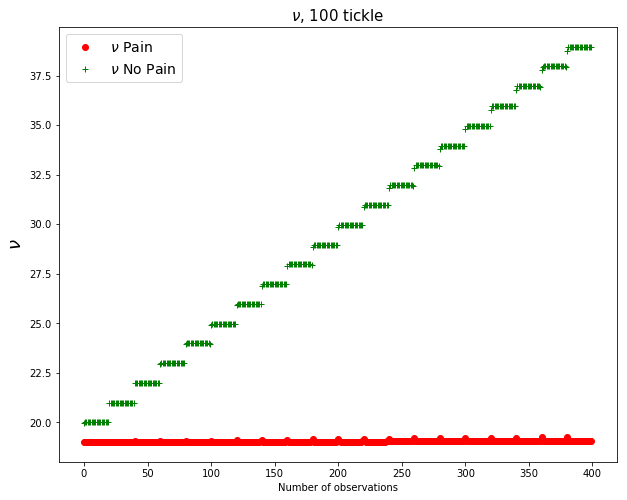

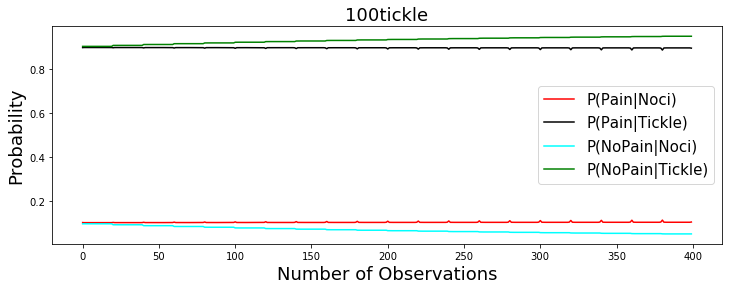

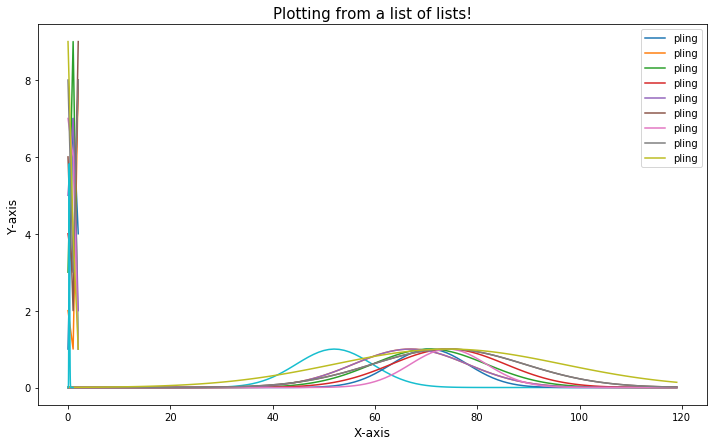

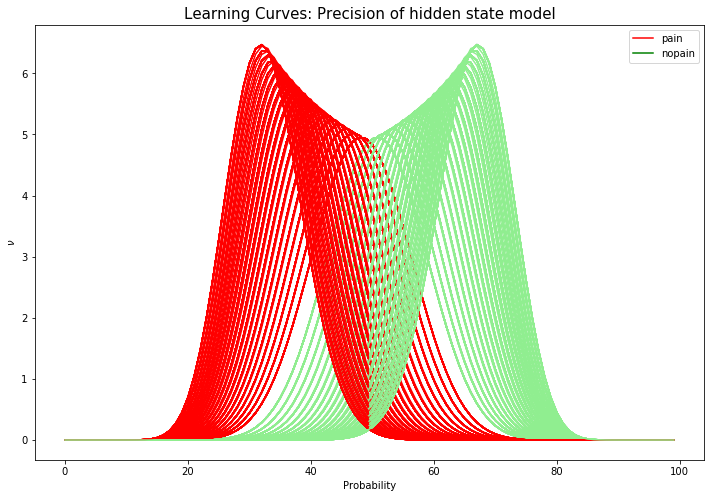

In [18]:
plt.figure(figsize=(12,8))
isfirst=True
for alpha,beta in zip(PCpain,PCnopain):
    plt.title('Learning Curves: Precision of hidden state model', fontsize=15)
    if isfirst:
        plt.plot(betaDis(beta,alpha,np.linspace(1,0,100)),color='red',label='pain')
    else:
        plt.plot(betaDis(beta,alpha,np.linspace(1,0,100)),color='red')
    if isfirst:
        plt.plot(betaDis(alpha,beta,np.linspace(1,0,100)),color='green',label='nopain')
        isfirst=False
    else:
        plt.plot(betaDis(alpha,beta,np.linspace(1,0,100)),color='lightgreen')
    plt.xlabel('Probability')
    plt.ylabel(r'$\nu$')
plt.legend()
plt.savefig('allimprecise_1Noci20Tickle.png')
plt.show()